In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bjontegaard_metric import BD_RATE, BD_PSNR

In [2]:
from test import split_dataframe, plot

In [4]:
csvdir1 = 'csvfiles/reporting_template_lossy.csv'
df1 = pd.read_csv(csvdir1)
df1_set = split_dataframe(df1, columns=['numOutputPointsT', 'numBitsGeoEncT', 'd1T', 'd2T'])

In [5]:
csvdir2 = 'csvfiles/test.csv'
df2 = pd.read_csv(csvdir2)
df2_set = split_dataframe(df2, columns=['numOutputPointsT', 'numBitsGeoEncT', 'd1T', 'd2T'])

In [6]:
seqs_name = 'queen_0200'
df1_one = df1_set[seqs_name]
df2_one = df2_set[seqs_name]

In [7]:
df1_one

,numOutputPointsT,numBitsGeoEncT,d1T,d2T
sequence,,,,
queen_0200,14683,17792,52.8047,56.0403
queen_0200,60202,60008,58.4318,62.6616
queen_0200,245633,211064,63.2098,69.0475
queen_0200,557335,494088,67.9742,73.6810
queen_0200,762959,645176,69.7067,75.0129
queen_0200,877650,712488,70.3955,75.4269


In [8]:
df2_one

,numOutputPointsT,numBitsGeoEncT,d1T,d2T
sequence,,,,
queen_0200,14683,17792,56.0403,52.8047
queen_0200,60202,60008,62.6616,58.4318
queen_0200,245633,211064,69.0475,63.2098
queen_0200,557335,494088,73.6810,67.9742
queen_0200,762959,645176,75.0129,69.7067
queen_0200,877650,712488,75.4269,70.3955


In [11]:
xlabel = 'numBitsGeoEncT'
ylabel = 'd1T'

In [12]:
# BD-Rate
R1 = df1_one[xlabel]
PSNR1 = df1_one[ylabel]
R2 = df2_one[xlabel]
PSNR2 = df2_one[ylabel]
bdrate = BD_RATE(R1, PSNR1, R2, PSNR2, piecewise=0)
print('bdrate:\t', bdrate)

bdrate:	 -63.218530251276704


save figure to  figs/queen_0200.png


'figs/queen_0200.png'

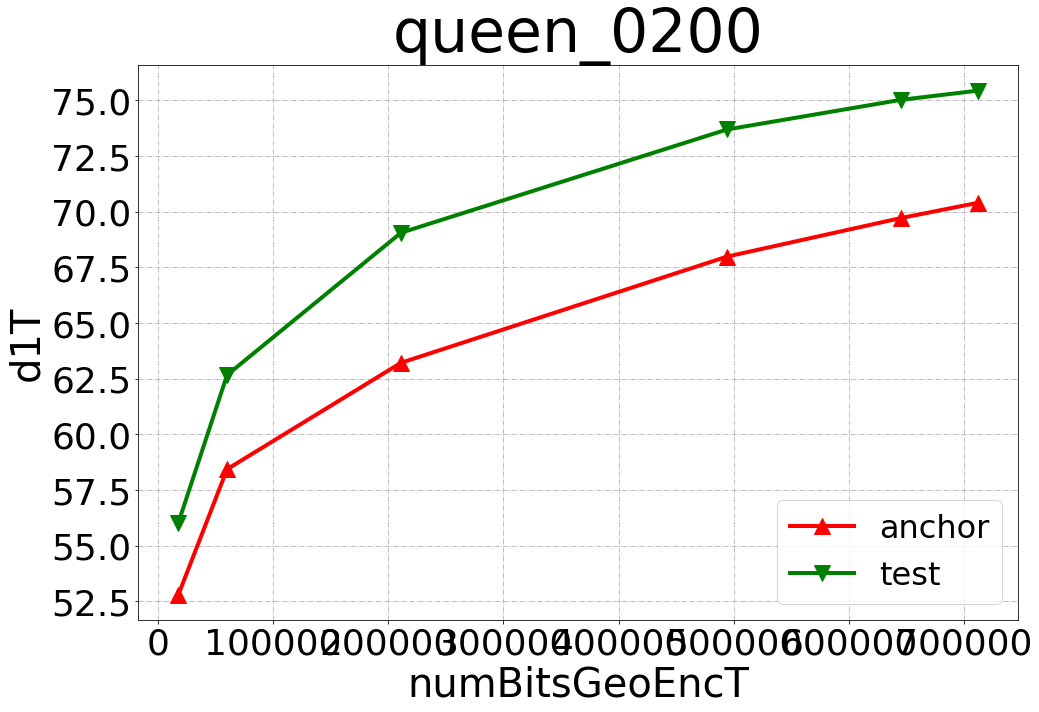

In [13]:
# plot
data1 = {'name':'anchor', 'xlabel':xlabel, 'ylabel':ylabel, 
    'x':df1_one[xlabel], 'y':df1_one[ylabel]}
data2 = {'name':'test', 'xlabel':xlabel, 'ylabel':ylabel, 
    'x':df2_one[xlabel], 'y':df2_one[ylabel]}
figdir = os.path.join('figs', seqs_name+'.png')
os.makedirs('figs', exist_ok=True)
plot([data1, data2], figdir=figdir)